In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating a sample messy warehouse overstock inventory dataset
data = {
    'Product_ID': [101, 102, 103, 104, 105, 106],
    'Product_Name': ['Cabin_Air_Clean', 'Circle_Drive_Oil', 'Fuel_Filter_Change', 'Engine_Crankcase', 'Window_Wiper_Blade', 'Rotating_Bit'],
    'Stock_Level': [50, 60, 120, 250, 'Overstocked', 300],
    'Demand_Frequency': [100, 120, 80, 90, 'High', 110],
    'Supplier': ['CAT_LPT', 'CAT_LN', 'Toromont', 'CAT_NV', 'Finning_BC', 'Finning_AL']
}

df = pd.DataFrame(data)


print("Initial Messy Warehouse Overstock Inventory Dataset:")
df




Initial Messy Warehouse Overstock Inventory Dataset:


,Product_ID,Product_Name,Stock_Level,Demand_Frequency,Supplier
0,101,Cabin_Air_Clean,50,100,CAT_LPT
1,102,Circle_Drive_Oil,60,120,CAT_LN
2,103,Fuel_Filter_Change,120,80,Toromont
3,104,Engine_Crankcase,250,90,CAT_NV
4,105,Window_Wiper_Blade,Overstocked,High,Finning_BC
5,106,Rotating_Bit,300,110,Finning_AL


# Mean to fill in missing values

In [2]:

df['Stock_Level'] = pd.to_numeric(df['Stock_Level'], errors='coerce')
df['Stock_Level'].fillna(df['Stock_Level'].mean(), inplace=True)


In [3]:
df['Supplier'] = df['Supplier'].astype('category')
df.drop_duplicates(inplace=True)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [4]:
df

,product_id,product_name,stock_level,demand_frequency,supplier
0,101,Cabin_Air_Clean,50.0,100,CAT_LPT
1,102,Circle_Drive_Oil,60.0,120,CAT_LN
2,103,Fuel_Filter_Change,120.0,80,Toromont
3,104,Engine_Crankcase,250.0,90,CAT_NV
4,105,Window_Wiper_Blade,156.0,High,Finning_BC
5,106,Rotating_Bit,300.0,110,Finning_AL


# Clip Stock_Level to be non-negative & Handle Demand_Frequency

In [5]:
df['stock_level'] = pd.to_numeric(df['stock_level'], errors='coerce').clip(lower=0)


numeric_demand_frequency = pd.to_numeric(df['demand_frequency'], errors='coerce')
df['demand_frequency'].fillna(numeric_demand_frequency.median(), inplace=True)



In [6]:
df

,product_id,product_name,stock_level,demand_frequency,supplier
0,101,Cabin_Air_Clean,50.0,100,CAT_LPT
1,102,Circle_Drive_Oil,60.0,120,CAT_LN
2,103,Fuel_Filter_Change,120.0,80,Toromont
3,104,Engine_Crankcase,250.0,90,CAT_NV
4,105,Window_Wiper_Blade,156.0,High,Finning_BC
5,106,Rotating_Bit,300.0,110,Finning_AL


In [7]:
# Feature Engineering
df['demand_status'] = np.where(numeric_demand_frequency == 'High', 'High Demand', 'Low Demand')

# Create a New Metric - Demand Index
df['demand_index'] = df['stock_level'] * numeric_demand_frequency


# Normilization 

In [8]:
# Demand_Index
df['demand_index_category'] = pd.cut(df['demand_index'], bins=[-float('inf'), 100, 200, float('inf')],
                                      labels=['Low', 'Medium', 'High'], include_lowest=True)

# Normalize Numeric Data
df['stock_level'] = (df['stock_level'] - df['stock_level'].min()) / (df['stock_level'].max() - df['stock_level'].min())
df['demand_frequency'] = (numeric_demand_frequency - numeric_demand_frequency.min()) / (
        numeric_demand_frequency.max() - numeric_demand_frequency.min())

In [9]:
df

,product_id,product_name,stock_level,demand_frequency,supplier,demand_status,demand_index,demand_index_category
0,101,Cabin_Air_Clean,0.000,0.50,CAT_LPT,Low Demand,5000.0,High
1,102,Circle_Drive_Oil,0.040,1.00,CAT_LN,Low Demand,7200.0,High
2,103,Fuel_Filter_Change,0.280,0.00,Toromont,Low Demand,9600.0,High
3,104,Engine_Crankcase,0.800,0.25,CAT_NV,Low Demand,22500.0,High
4,105,Window_Wiper_Blade,0.424,NaN,Finning_BC,Low Demand,NaN,NaN
5,106,Rotating_Bit,1.000,0.75,Finning_AL,Low Demand,33000.0,High


In [10]:
df['stock_level'] = df['stock_level'].interpolate(method='linear', limit_direction='both')

In [11]:
df.to_csv('cleaned_warehouse_overstock_inventory.csv', index=False)

# Display the clean dataset
print("Cleaned Warehouse Overstock Inventory Dataset:")
df

Cleaned Warehouse Overstock Inventory Dataset:


,product_id,product_name,stock_level,demand_frequency,supplier,demand_status,demand_index,demand_index_category
0,101,Cabin_Air_Clean,0.000,0.50,CAT_LPT,Low Demand,5000.0,High
1,102,Circle_Drive_Oil,0.040,1.00,CAT_LN,Low Demand,7200.0,High
2,103,Fuel_Filter_Change,0.280,0.00,Toromont,Low Demand,9600.0,High
3,104,Engine_Crankcase,0.800,0.25,CAT_NV,Low Demand,22500.0,High
4,105,Window_Wiper_Blade,0.424,NaN,Finning_BC,Low Demand,NaN,NaN
5,106,Rotating_Bit,1.000,0.75,Finning_AL,Low Demand,33000.0,High


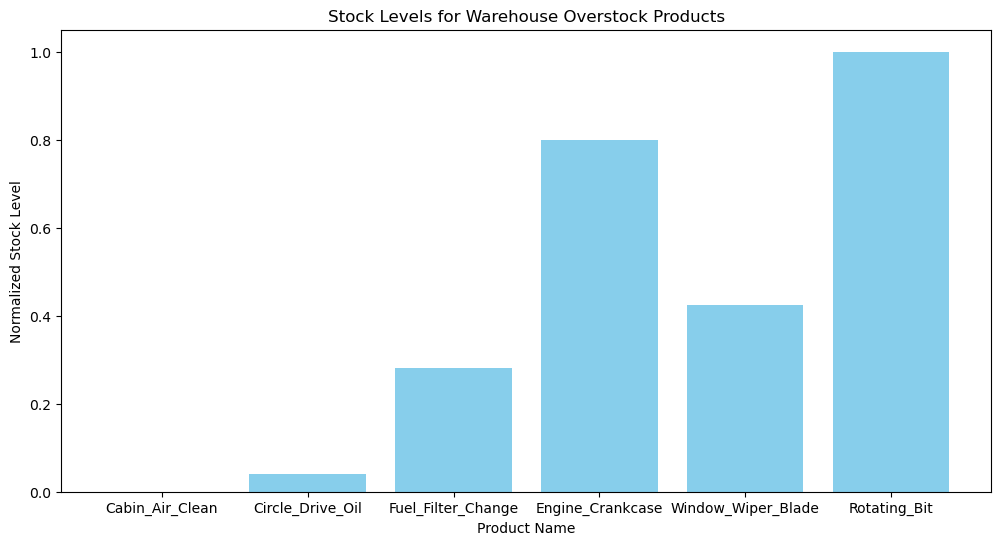

In [12]:
# Visualization: Bar chart of Stock Levels by Product
plt.figure(figsize=(12, 6))
plt.bar(df['product_name'], df['stock_level'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Normalized Stock Level')
plt.title('Stock Levels for Warehouse Overstock Products')
plt.show()

# how can i calculate demand frequency of Window_Wiper_Blade?

In [13]:
# to convert "high" for demand frequncy into a numeric data so i do data modelling 